### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points

##### Main points:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 



####  Good luck and have fun!


##### Task 1. Dataloader

In [165]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from PIL import Image
import numpy as np
 

# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
train_X = trainX.reshape((trainX.shape[0], 28, 28, 1))
test_X = testX.reshape((testX.shape[0], 28, 28, 1))
# convert from integers to floats
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_X = train_norm / 255.0
test_X = test_norm / 255.0
# one hot encode target values
train_Y = to_categorical(trainY)
test_Y = to_categorical(testY)




##### Task 2. Augmentation

y = 2 original image


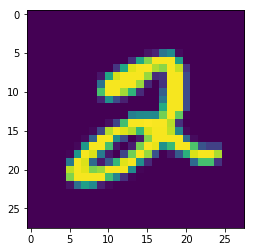

In [166]:
def random_rotation(image):
    # pick a random degree of rotation between 45% on the left and 45% on the right
    random_degree = random.uniform(-45, 45)
    return sk.transform.rotate(image, random_degree)

def random_noise(image):
    # add random noise to the image
    return sk.util.random_noise(image)

def horizontal_flip(image):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image[:, ::-1]
def crop_image(image):
    return image[5:23,5:23]
#change the index if you want to see other pictures as well
index = 5                
image = trainX[index]
plt.imshow(image)
print ("y = " + str(np.squeeze(trainY[index]))+" original image")


Rotated image


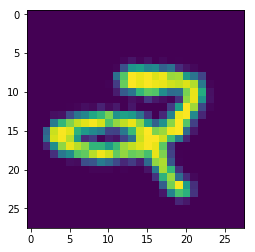

In [167]:
image1 = random_rotation(image)
plt.imshow(image1)
print ("Rotated image")

Noisy image


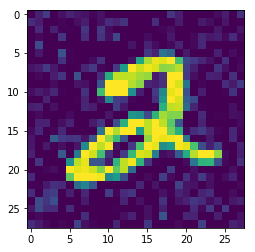

In [168]:
image2 = random_noise(image)
plt.imshow(image2)
print ("Noisy image")

Flipped image


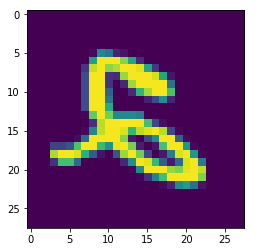

In [169]:
image3 = horizontal_flip(image)
plt.imshow(image3)
print ("Flipped image")

Cropped image


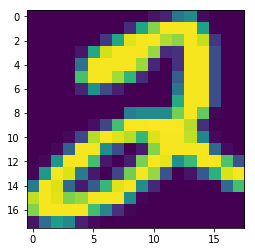

In [170]:
image4 = crop_image(image)
plt.imshow(image4)
print ("Cropped image")

##### Task 3. Neural Network

In [171]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    




##### Task 4. Train loop

In [172]:

    
history = model.fit(train_X, train_Y, epochs=15, batch_size=64, validation_data=(test_X, test_Y), verbose=0)

##### Task 5. Loss plot

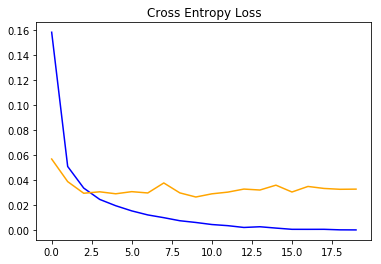

In [173]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.show()

##### Task 6. Test set accuracy

In [174]:
_, acc = model.evaluate(test_X, test_Y,batch_size = 64, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.230


##### Task 7. Inference

The number is 4 and it was predicted as[[9.4228685e-18 2.9953587e-13 1.5242753e-17 8.5482287e-17 9.9999988e-01
  3.9197175e-16 1.7208132e-15 6.5139262e-13 1.5415425e-14 8.1747572e-08]] where the number is the index of maximum number in the output.


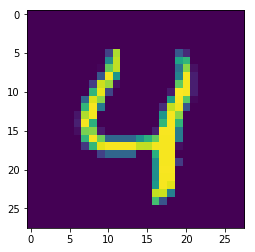

In [163]:


test_image = test_X[4]
test_image = np.reshape(test_image,(1,test_image.shape[0],test_image.shape[1],test_image.shape[2]))
out = model.predict(test_image)

plt.imshow(testX[4])
print("The number is "+ str(testY[4])+ " and it was predicted as" + str(out)+\
      " where the number is the index of maximum number in the output.")


The number is 1 and it was predicted as[[1.3356225e-08 9.9999952e-01 4.7655253e-09 4.2686247e-11 8.0384543e-09
  4.5558882e-10 4.9205684e-10 1.3077143e-07 3.0947234e-07 4.5902107e-10]] where the number is the index of maximum number in the output.


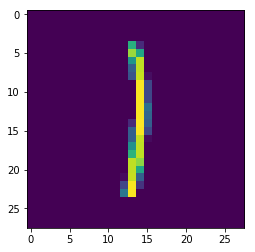

In [164]:
test_image = test_X[40]
test_image = np.reshape(test_image,(1,test_image.shape[0],test_image.shape[1],test_image.shape[2]))
out = model.predict(test_image,batch_size = 64)
plt.imshow(testX[40])
print("The number is "+ str(testY[40])+ " and it was predicted as" + str(out)+\
      " where the number is the index of maximum number in the output.")
